In [1]:
#import 
import logging
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from umap import UMAP
import matplotlib.pyplot as plt
from reval.best_nclust_cv import FindBestClustCV

In [6]:
main_path = '/Users/vmandelli/OneDrive - Fondazione Istituto Italiano Tecnologia/vine_old_edition'
data_path = os.path.join(main_path,"data","tidy","vineland_210722")
results_path = os.path.join(main_path,"results")
plot_path = os.path.join(main_path,"plot")

In [17]:
file = 'VABS_ASD_older_than72_1timepoint_20220726.csv'
df = pd.read_csv(os.path.join(data_path,file),
                        header=0,
                        low_memory=False,
                        index_col='subjectkey')

#df.drop('Unnamed: 0', 1, inplace = True)
df.head(5)

,collection_id,src_subject_id,sex,interview_age,interview_date,communicationdomain_totalb,livingskillsdomain_totalb,socializationdomain_totalb,motorskillsdomain_totalb,composite_totalb,collection_id.1,edition,vabs_type,miss,age_round
subjectkey,,,,,,,,,,,,,,,
NDARUR864GDR,2026,3005,M,73,08/13/2013,36.0,41.0,48.0,61.0,44.0,2026,2,survey,0,6.083333
NDARUZ978TZ7,1,168-3372,M,73,01/27/2009,69.0,64.0,59.0,78.0,64.0,1,2,survey,0,6.083333
NDARDA487RHJ,2262,212,F,73,04/16/2016,74.0,66.0,57.0,56.0,61.0,2262,2,survey,0,6.083333
NDARJW531AVE,1,168-3776,M,73,10/07/2009,72.0,85.0,61.0,100.0,76.0,1,2,survey,0,6.083333
NDARPM369WUN,2020,20013,M,73,04/28/2015,42.0,51.0,53.0,56.0,49.0,2020,2,survey,0,6.083333


In [18]:
vabs_names = ['communicationdomain_totalb','livingskillsdomain_totalb',
              'socializationdomain_totalb']
col2use=vabs_names

In [19]:
# exclude very old subjects- maybe data entry error?
df = df[df['interview_age']<780]

In [20]:
df['quantile_age'] = pd.qcut(df['interview_age'], 10,labels=range(10))
df['sex']=df['sex'].str.upper()
df.head(500)

,collection_id,src_subject_id,sex,interview_age,interview_date,communicationdomain_totalb,livingskillsdomain_totalb,socializationdomain_totalb,motorskillsdomain_totalb,composite_totalb,collection_id.1,edition,vabs_type,miss,age_round,quantile_age
subjectkey,,,,,,,,,,,,,,,,
NDARUR864GDR,2026,3005,M,73,08/13/2013,36.0,41.0,48.0,61.0,44.0,2026,2,survey,0,6.083333,0
NDARUZ978TZ7,1,168-3372,M,73,01/27/2009,69.0,64.0,59.0,78.0,64.0,1,2,survey,0,6.083333,0
NDARDA487RHJ,2262,212,F,73,04/16/2016,74.0,66.0,57.0,56.0,61.0,2262,2,survey,0,6.083333,0
NDARJW531AVE,1,168-3776,M,73,10/07/2009,72.0,85.0,61.0,100.0,76.0,1,2,survey,0,6.083333,0
NDARPM369WUN,2020,20013,M,73,04/28/2015,42.0,51.0,53.0,56.0,49.0,2020,2,survey,0,6.083333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDARVF019FMR,6,10946,M,94,07/09/2009,86.0,83.0,75.0,999.0,79.0,6,2,parent,0,7.833333,1
NDARMK862FP7,2025,9332,M,94,06/11/2016,90.0,74.0,68.0,88.0,76.0,2025,2,survey,0,7.833333,1
NDARBN123AKA,2072,654,F,94,01/13/2016,90.0,81.0,87.0,999.0,84.0,2072,2,survey,0,7.833333,1


(2561, 16)


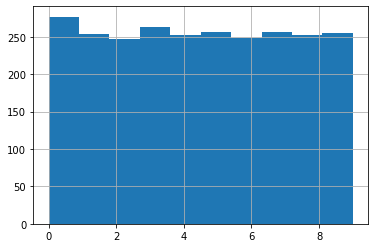

In [21]:
df['quantile_age'].hist()
print(df.shape)

In [24]:
# train and test split
strat_vect = df['sex'] + df['quantile_age'].astype("str") + df['vabs_type']
X_tr_split, X_ts_split = train_test_split(df,
                             stratify = strat_vect,
                             test_size=0.33,
                             random_state=42)
print('there are ',X_tr_split.shape,' subject in the train set')
print('there are ',X_ts_split.shape,' subject in the test set')

there are  (1715, 16)  subject in the train set
there are  (846, 16)  subject in the test set


In [28]:
X_tr_split.to_csv(os.path.join(results_path,'Train_old_edition.csv'))
X_ts_split.to_csv(os.path.join(results_path,'Test_old_edition.csv'))